In [23]:
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from plots.chapter0 import *
print("Test")

Test


# Visualizing Gradient Descent
## Model
$$y=b+\omega x+\epsilon$$
## Data Generation
### Synthetic Data Generation

In [24]:
true_b = 1
true_w = 2
N = 100

np.random.seed(42)
x = np.random.rand(N, 1) # N rows and 1 column; of [0,1] range
epsilon = 0.1 * np.random.randn(N,1) # pick N points from Random Normal initializer
y = true_b + true_w * x + epsilon


### Train - Validation - Test Split

(<Figure size 1200x600 with 2 Axes>,
 array([<Axes: title={'center': 'Generated Data - Train'}, xlabel='x', ylabel='y'>,
        <Axes: title={'center': 'Generated Data - Validation'}, xlabel='x', ylabel='y'>],
       dtype=object))

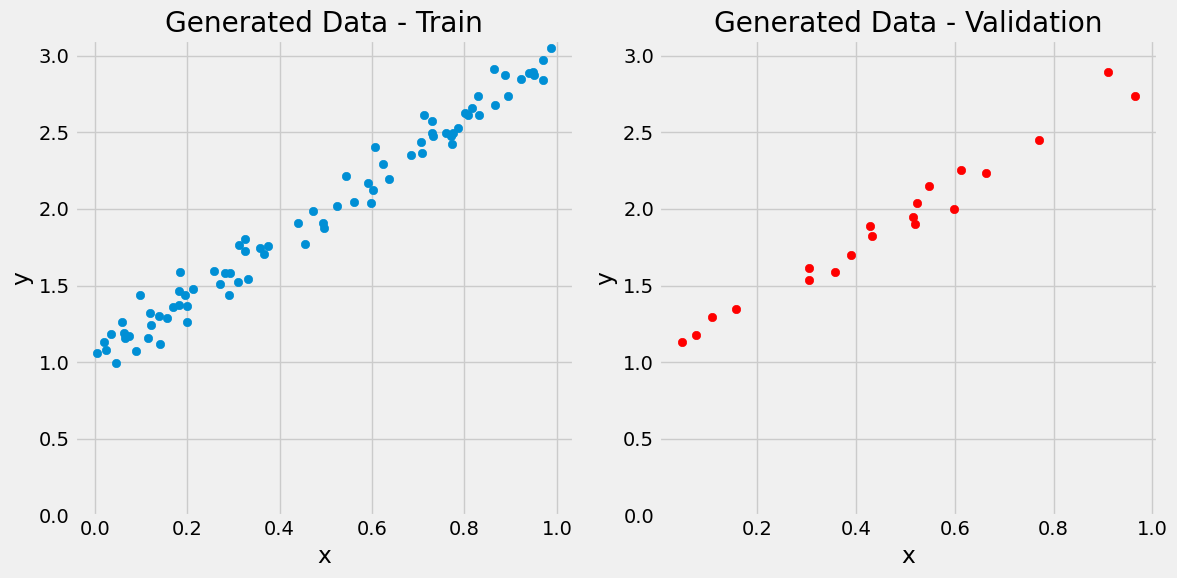

In [25]:
idx = np.arange(N)
np.random.shuffle(idx)
train_idx = idx[:int(N*0.8)]
val_idx = idx[int(N*0.8):]
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]
figure1(x_train, y_train, x_val, y_val)

### Step 0: Random Initialization

In [26]:
np.random.seed(42)
b = np.random.rand(1)
w = np.random.rand(1)
print(b, w)

[0.37454012] [0.95071431]


### Step 1: Compute Model's Predictions

(<Figure size 600x600 with 1 Axes>, <Axes: xlabel='x', ylabel='y'>)

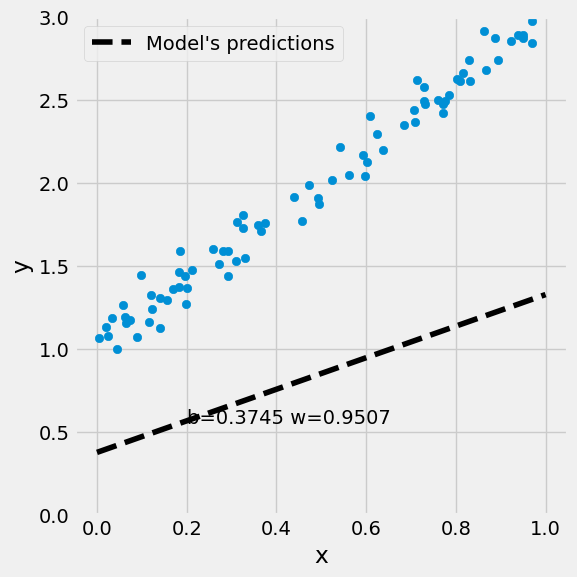

In [27]:
yhat = b + w*x_train
figure2(x_train, y_train, b, w)

### Compute the loss
$$
error_i = \hat{y}_i - y_i
$$

(<Figure size 600x600 with 1 Axes>, <Axes: xlabel='x', ylabel='y'>)

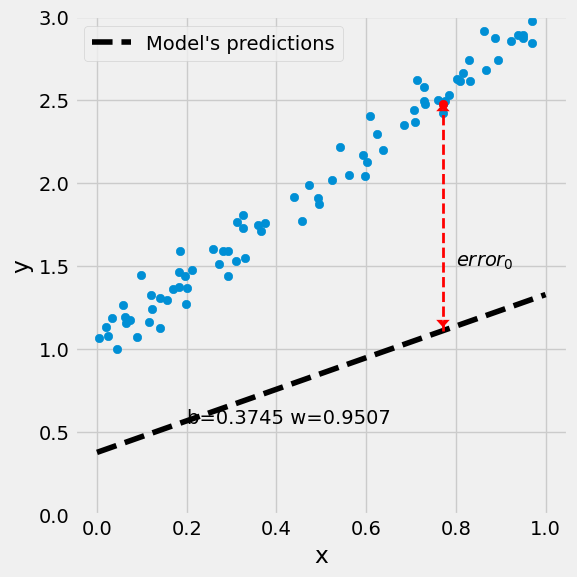

In [28]:
figure3(x_train, y_train, b, w)

$$
MSE = \frac{1}{n} \sum_{i=1}^{n} error_i^2 = \frac{1}{n} \sum_{i=1}^{n}(\hat{y}_i - y_i)^2 = \frac{1}{n} \sum_{i=1}^{n}(b+\omega x_i - y_i)^2
$$

In [29]:
# We are using ALL data points to calculate loss
error = yhat - y_train 
loss = (error**2).mean()
print(loss)

1.3823577862834915


In [30]:
# We test ALL possible weights
b_range = np.linspace(true_b-3, true_b+3, 101)
w_range = np.linspace(true_w-3, true_w+3, 101)
bs, ws = np.meshgrid(b_range, w_range)
bs.shape, ws.shape # both (101,101)

((101, 101), (101, 101))

In [31]:
bs

array([[-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       ...,
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ]], shape=(101, 101))

In [32]:
ws

array([[-1.  , -1.  , -1.  , ..., -1.  , -1.  , -1.  ],
       [-0.94, -0.94, -0.94, ..., -0.94, -0.94, -0.94],
       [-0.88, -0.88, -0.88, ..., -0.88, -0.88, -0.88],
       ...,
       [ 4.88,  4.88,  4.88, ...,  4.88,  4.88,  4.88],
       [ 4.94,  4.94,  4.94, ...,  4.94,  4.94,  4.94],
       [ 5.  ,  5.  ,  5.  , ...,  5.  ,  5.  ,  5.  ]], shape=(101, 101))

In [33]:
# pick a dummy value and get ALL combinations with w and b
dummy_x = x_train[0]
dummy_yhat = bs + ws*dummy_x
dummy_yhat.shape

(101, 101)

In [34]:
# apply that to ALL x_train (shape (80,1))
all_predictions = np.apply_along_axis(
    func1d = lambda x: bs+ws*x,
    axis=1,
    arr=x_train
)
all_predictions.shape

(80, 101, 101)

In [35]:
all_labels = y_train.reshape(-1,1,1)
all_labels.shape

(80, 1, 1)

In [36]:
# broadcasting to calculate errors of ALL data points
all_errors = all_predictions - all_labels
all_errors.shape

(80, 101, 101)

In [37]:
# mean error over 80 datapoints (for each combination of w and b)
all_losses = (all_errors**2).mean(axis=0)
all_losses.shape

(101, 101)

(<Figure size 1200x600 with 1 Axes>,
 <Axes3D: title={'center': 'Loss Surface'}, xlabel='b', ylabel='w'>)

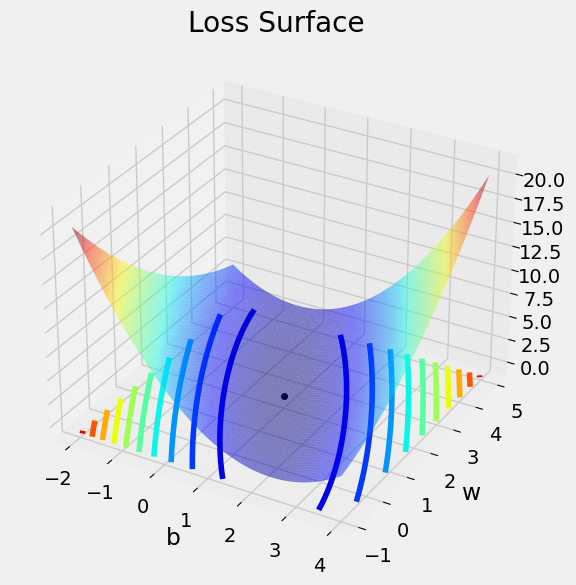

In [38]:
# b, w: random initial guess
figure4(x_train, y_train, b, w, bs, ws, all_losses)